# Master BigData UCM 2023

## 1. Datos COVID



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-proceso

In [2]:
covid = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/datos_covid.pkl")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
type(covid)

pandas.core.frame.DataFrame

In [5]:
covid.shape

(1179780, 8)

In [6]:
covid.describe(include = 'all', datetime_is_numeric=True)

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1157520,1179780,1179780,1179780,1.179780e+06,1.179780e+06,1.179780e+06,1.179780e+06
unique,52,3,10,NaN,NaN,NaN,NaN,NaN
top,A,H,0-9,NaN,NaN,NaN,NaN,NaN
freq,22260,393260,117978,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2021-01-05 12:00:00.000000256,6.435463e+00,3.816534e-01,3.787401e-02,7.660327e-02
min,NaN,NaN,NaN,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,2020-07-04 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,2021-01-05 12:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,2021-07-10 00:00:00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,NaN,NaN,NaN,2022-01-11 00:00:00,2.820000e+03,2.690000e+02,3.500000e+01,1.000000e+02


# 2. Heatmap con seaborn

Además del contenido recogido en la docu. teórica:

https://seaborn.pydata.org/tutorial.html

es aconsejable seguir este excelente (y práctico) tutorial:

https://pythonbasics.org/seaborn-heatmap/


## 2.1 Barplot por sexo y edad



In [7]:
covid2 = covid.groupby(['provincia_iso', 'grupo_edad']).sum()

<ipython-input-7-1eb30946c4a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid2 = covid.groupby(['provincia_iso', 'grupo_edad']).sum()


In [8]:
covid2.shape

(520, 4)

In [9]:
covid2.head()

num_casos  num_hosp  num_uci  num_def
provincia_iso grupo_edad                                       
A             0-9             21790       183        4        0
              10-19           35583       217        6        1
              20-29           42463       535       11        3
              30-39           40035       905       46       10
              40-49           46716      1672      159       55

In [10]:
covid2 = pd.DataFrame(covid2.to_records()) # tenemos claves en vez de variables

In [11]:
covid2.head()

,provincia_iso,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,A,0-9,21790,183,4,0
1,A,10-19,35583,217,6,1
2,A,20-29,42463,535,11,3
3,A,30-39,40035,905,46,10
4,A,40-49,46716,1672,159,55


Número de hospitalizaciones:

In [12]:
covid2_hosp = covid2[['provincia_iso',
                      'grupo_edad',
                      'num_hosp']]

In [13]:
covid2_hosp.head()

,provincia_iso,grupo_edad,num_hosp
0,A,0-9,183
1,A,10-19,217
2,A,20-29,535
3,A,30-39,905
4,A,40-49,1672


<ipython-input-14-8693c3b66e67>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  covid2_hosp = covid2_hosp.pivot("provincia_iso", "grupo_edad", "num_hosp")


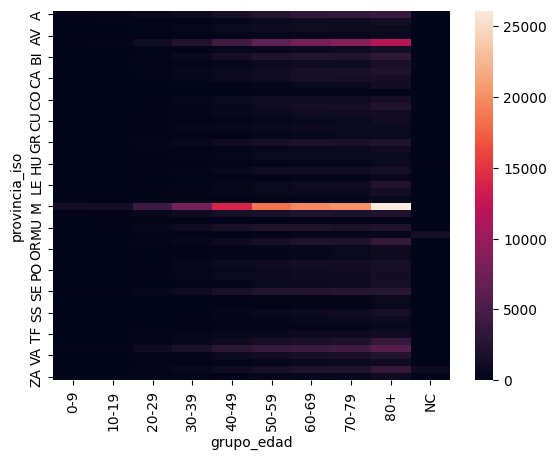

In [14]:
covid2_hosp = covid2_hosp.pivot("provincia_iso", "grupo_edad", "num_hosp")
ax = sns.heatmap(covid2_hosp)


In [36]:
covid2_hosp.head()

grupo_edad,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,NC
provincia_iso,,,,,,,,,,
A,183,217,535,905,1672,2547,3277,3459,3958,1
AB,45,46,108,203,383,677,836,901,1322,0
AL,65,44,205,424,622,825,938,848,770,0
AV,10,18,28,66,126,237,313,373,723,0
B,170,217,978,2197,4401,6406,7728,8773,11813,0


Problemas:
- La escala de colores no tiene mucho sentido. Los colores fuertes de asocian a mayores cantidades.
- No se ven todas las provincias.

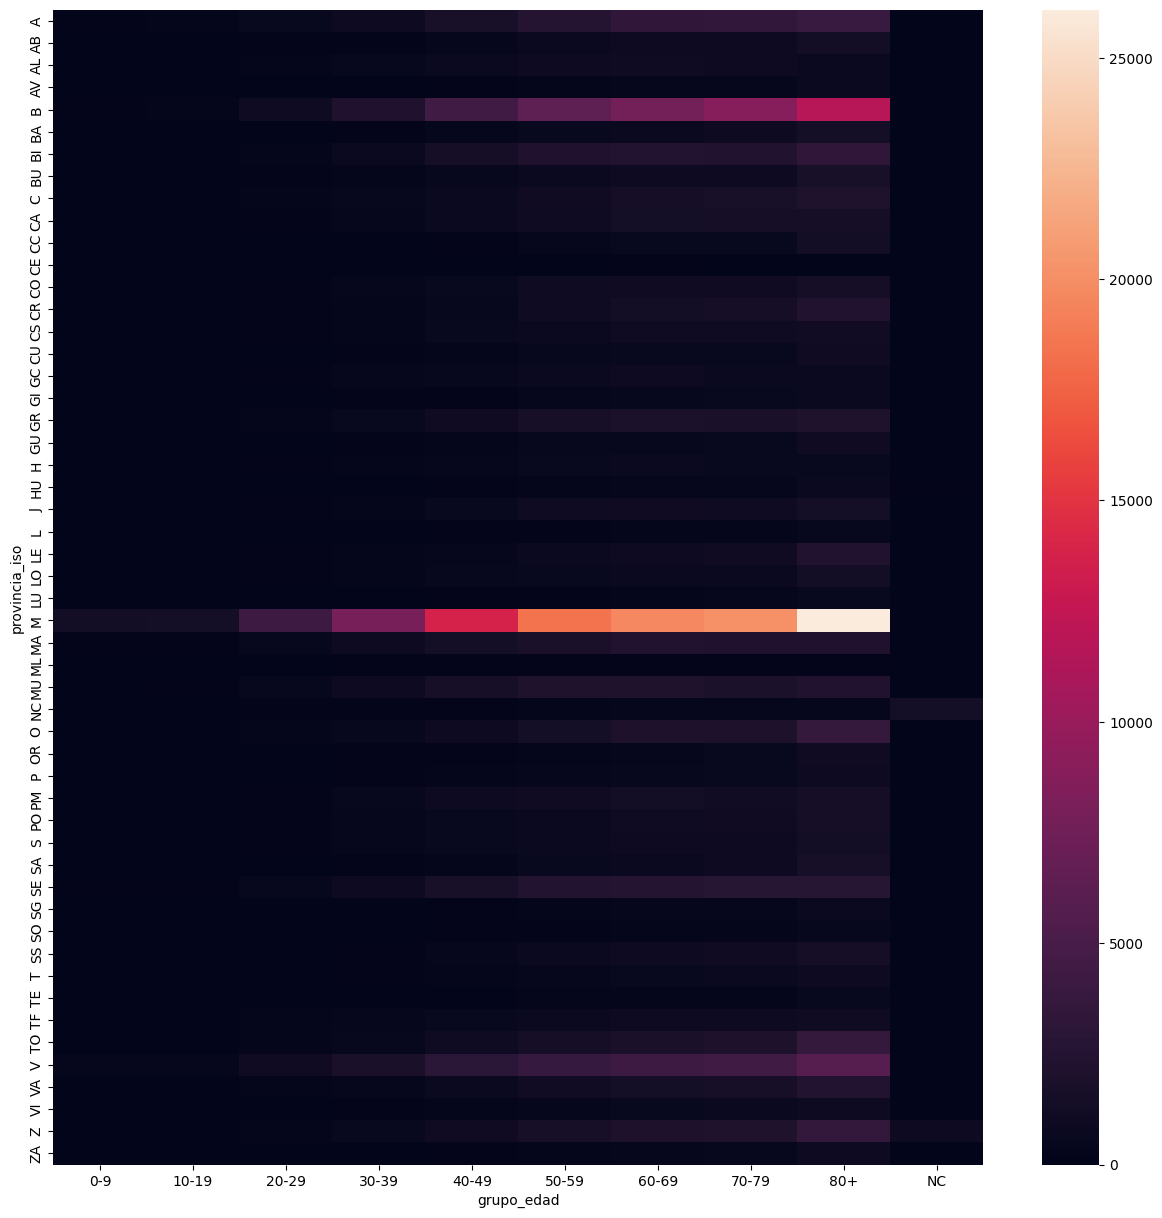

In [15]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
ax = sns.heatmap(covid2_hosp)

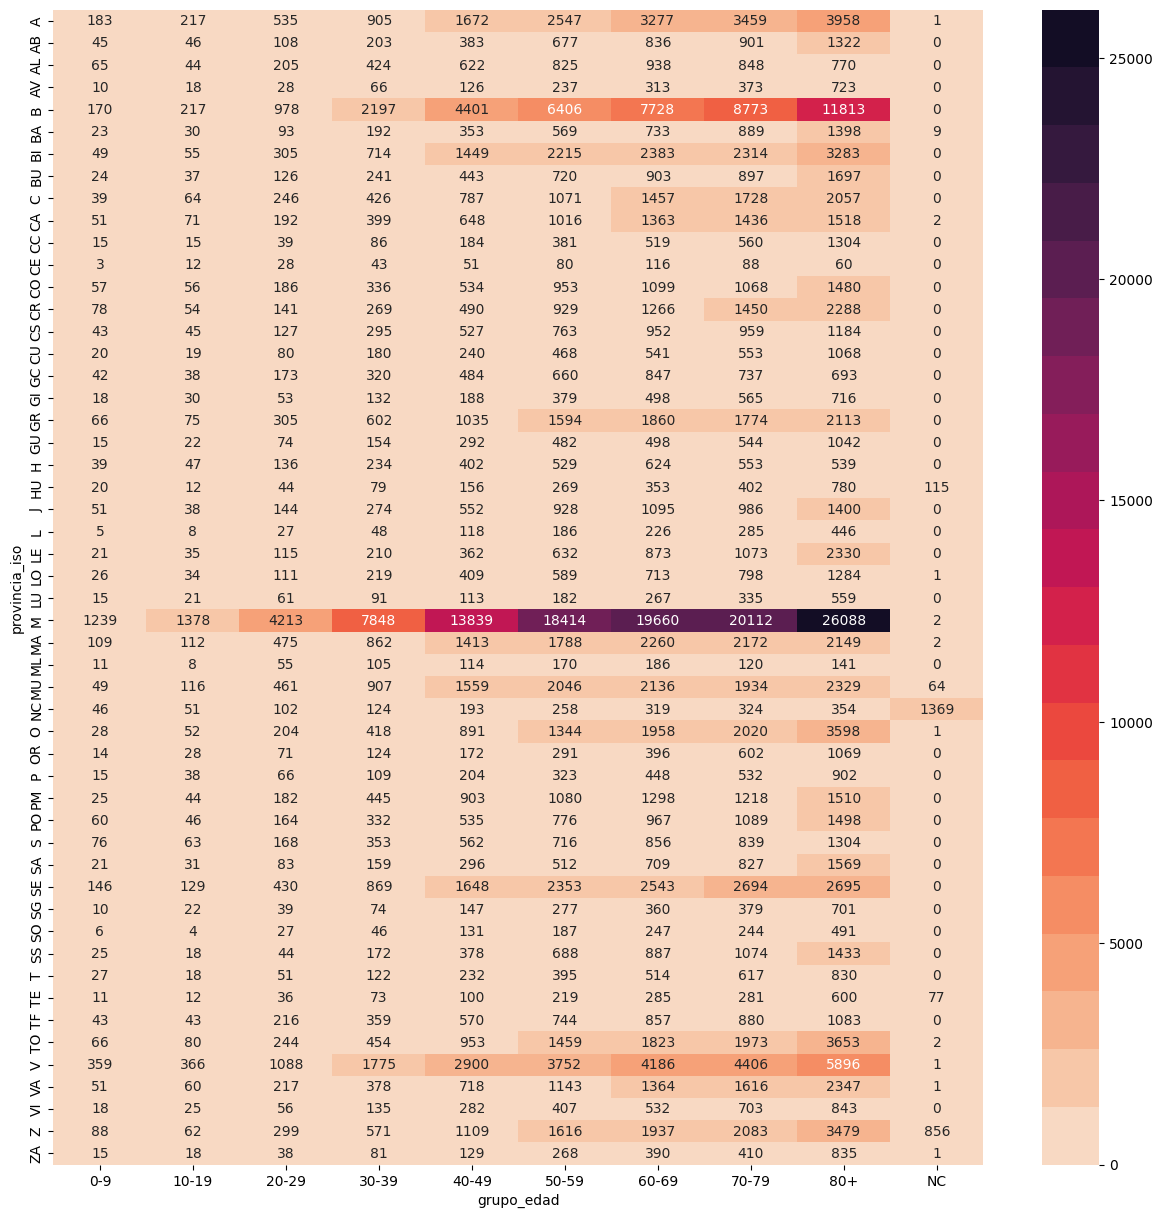

In [22]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
diverging_colors = sns.color_palette("rocket_r", 20)  # Elegimos una paleta secuencial
ax = sns.heatmap(covid2_hosp,
                 cmap=diverging_colors,
                 annot = True,
                 fmt = "g")

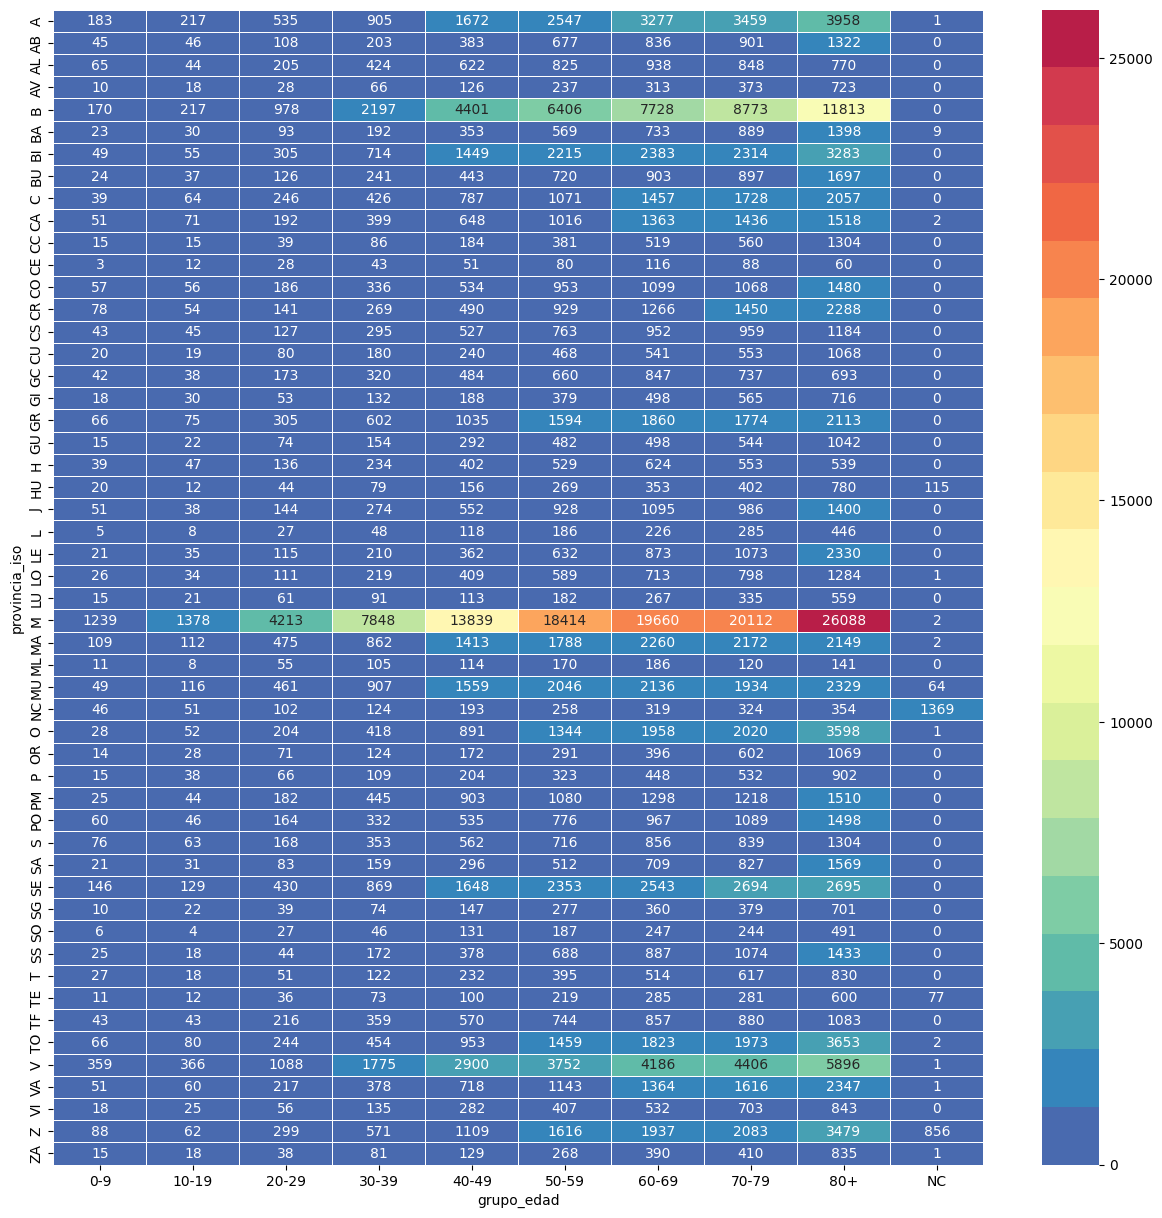

In [33]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
mypalette = sns.color_palette("Spectral_r",n_colors = 20)   # paleta divergent
ax = sns.heatmap(covid2_hosp,
                 cmap = mypalette,
                 annot=True,
                 fmt = "g",
                 linewidths=.5)

Número de defunciones:

In [41]:
covid2_def = covid2[['provincia_iso',
                      'grupo_edad',
                      'num_def']]
covid2_def_piv = covid2_def.pivot("provincia_iso", "grupo_edad", "num_def")

<ipython-input-41-952aa42d61ad>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  covid2_def_piv = covid2_def.pivot("provincia_iso", "grupo_edad", "num_def")


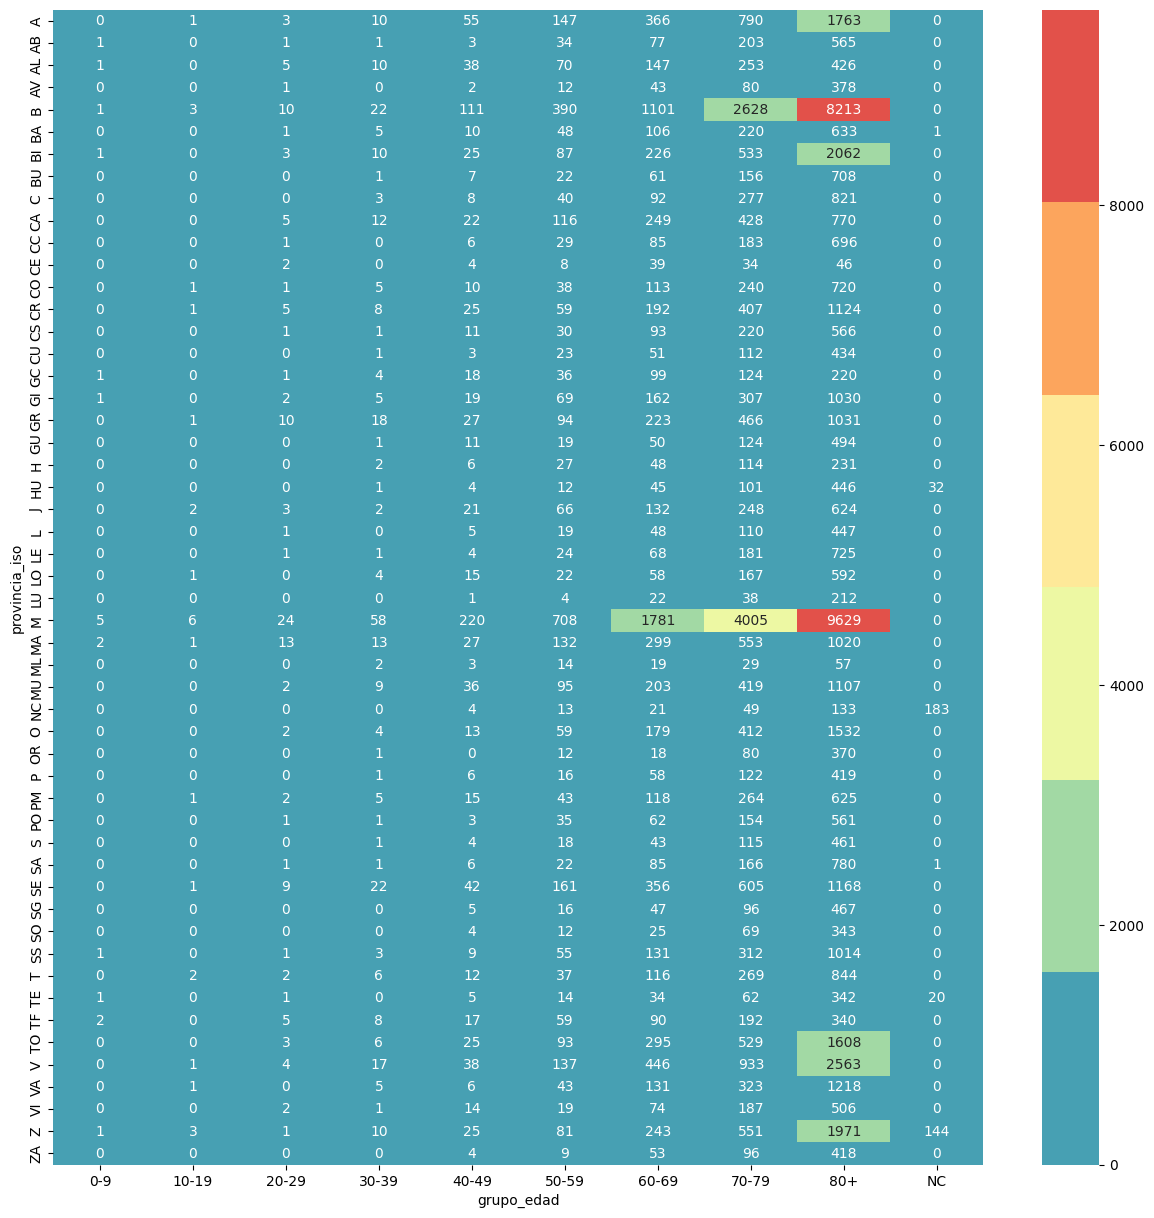

In [43]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
mypalette = sns.color_palette("Spectral_r")
ax = sns.heatmap(covid2_def_piv,
                cmap = mypalette,
                annot=True,
                fmt = "g")